In [1]:
import tensorflow as tf
import json

import numpy as np
from matplotlib import pyplot as plt

In [2]:
import os
import time
import uuid
import cv2

## 1. Only keep those files that exist in both folders

In [88]:
# Set the paths to the two folders
folder1_path = 'D:/Training Data - YSG/Nat/images'
folder2_path = 'D:/Training Data - YSG/Nat/labels'

# Get the list of file names (without extension) in folder1
folder1_files = set([os.path.splitext(file_name)[0] for file_name in os.listdir(folder1_path)])

# Get the list of file names (without extension) in folder2
folder2_files = set([os.path.splitext(file_name)[0] for file_name in os.listdir(folder2_path)])

# Find the set of file names (without extension) that exist in both folders
common_files = folder1_files & folder2_files

# Delete the files (with extension) that don't exist in both folders
for file_name in os.listdir(folder1_path):
    file_name_without_extension = os.path.splitext(file_name)[0]
    if file_name_without_extension not in common_files:
        file_path = os.path.join(folder1_path, file_name)
        os.remove(file_path)

for file_name in os.listdir(folder2_path):
    file_name_without_extension = os.path.splitext(file_name)[0]
    if file_name_without_extension not in common_files:
        file_path = os.path.join(folder2_path, file_name)
        os.remove(file_path)

In [89]:
# Delete non jpg images 

def delete_non_jpg_images(directory_path):
    for filename in os.listdir(directory_path):
        if not filename.lower().endswith('.jpg'):
            file_path = os.path.join(directory_path, filename)
            os.remove(file_path)
            
            # Delete any JSON files with the same name in the JSON folder
            name_without_extension = os.path.splitext(filename)[0]
            json_filename = name_without_extension + '.json'
            json_path = os.path.join(json_folder_path, json_filename)
            if os.path.exists(json_path):
                os.remove(json_path)

delete_non_jpg_images(directory_path)

## 2. Only keep those files that have a dimension of 450x450

The following images do not have the dimensions of (450, 450): ['0511_P14', '0a554696-9fa1-d65c-6372-3773adaf5e1e_620', '1520217912046', '1577983629-9637', '1609915627268e05b29da34e1fdd6', '1658392895-scatola-with-italian-grey-scaled', '2020-housebeautiful-how-to-build-a-fire-still12-1587143012', '22d8712eeb5a9fa9b78bc0cf520feaf0_620', '22manhattan-fire-pit-table-manhattan-fireplace-living_700x700', '240_240A1500x1500_5_661dbdae-6db9-4541-bf3a-fa1968deca77', '293666-800x694-kitchenfire', '2df917da7ddb16cfab8a6ea73cc984ea--indoor-fire-pit-outdoor-fire', '360_F_586874452_X0TINlCNggSVaodXI83dmvxW5P0sYZQ2', '417', '4198.jpg_wh300', '4199.jpg_wh300', '426201931700_8csevihuup_cofire', '5-leading-causes-of-house-fires', '5_10430115_b', '61b9d14e07414', '61qeWtewgIL._AC_UF8941000_QL80_', '71OSQl9SviL._AC_UF8941000_QL80_', '746735-533475-1287x836', '800px-Open_fireplace_with_icon', '950', '9a8e7585-f3c6-df2b-1e97-0cb4099fe161', 'a1679ff47855375932380e63d5c347d0', 'arc-explosion', 'Base_40_Ethan

NameError: name 'length' is not defined

In [60]:
print()

97


## 3. Rescale the coords in all the json files


In [90]:
for filename in os.listdir(json_folder_path):
    if filename.endswith(".json"):
        # Open the JSON file for reading
        with open(os.path.join(json_folder_path, filename), "r") as f:
            data = json.load(f)
        
        points = data["shapes"][0]["points"]
        
        x1 = points[0][0]
        y1 =  points[0][1]
        x2 = points[1][0]
        y2 = points[1][1]
        
        h = data["imageHeight"]
        w = data["imageWidth"]
        
        x1 = (x1 / w) * 450
        y1 = (y1 / h) * 450
        
        x2 = (x2 / w) * 450
        y2 = (y2 / h) * 450
        
        data["shapes"][0]["points"][0][0] = x1
        data["shapes"][0]["points"][0][1] = y1
        data["shapes"][0]["points"][1][0] = x2
        data["shapes"][0]["points"][1][1] = y2

        # Write the modified data back to the file
        with open(os.path.join(json_folder_path, filename), "w") as f:
            json.dump(data, f)

##  4. Scale all the images to 450 x 450


In [91]:
import os
from PIL import Image

# Set the desired image size
new_size = (450, 450)

# Loop through each image in the directory
for filename in os.listdir(directory_path):
    if filename.endswith('.jpg'):
        # Open the image file
        image_path = os.path.join(directory_path, filename)
        image = Image.open(image_path)

        # Resize the image to the desired size
        scaled_image = image.resize(new_size)

        # Save the resized image with a new file name
        scaled_filename = os.path.splitext(filename)[0] + '.jpg'
        scaled_image_path = os.path.join(directory_path, scaled_filename)
        scaled_image.save(scaled_image_path)

## 5. Remove all the images that aren't 450 x 450


In [92]:
import os
import json
from PIL import Image

# Set the directory path to the folder containing your images
directory_path = 'D:/Training Data - YSG/Nat/images'

# Set the desired image size
new_size = (450, 450)

# Set the path to the folder containing the JSON files
json_folder_path = 'D:/Training Data - YSG/Nat/labels'



# Function to check if an image has the desired dimensions
def has_desired_dimensions(image_path):
    image = Image.open(image_path)
    width, height = image.size
    return width == new_size[0] and height == new_size[1]

# Function to store the name without extension of images that do not have the desired dimensions
def store_names_of_wrong_size_images():
    # Create a list to store the names of images that do not have the desired dimensions
    wrong_size_image_names = []

    # Loop through each image in the directory and check its dimensions
    for filename in os.listdir(directory_path):
        if filename.lower().endswith('.jpg'):
            # Check if the image has the desired dimensions
            image_path = os.path.join(directory_path, filename)
            if not has_desired_dimensions(image_path):
                # Store the name of the image without extension
                name_without_extension = os.path.splitext(filename)[0]
                wrong_size_image_names.append(name_without_extension)

                # Delete the image from the folder
                os.remove(image_path)

    # Return the list of names of images that do not have the desired dimensions
    return wrong_size_image_names

# Call the function to store the names of images that do not have the desired dimensions
wrong_size_image_names = store_names_of_wrong_size_images()

# Print out the names of images that do not have the desired dimensions
print(f"The number of images that do not have the dimension of 450 x 450: {len(wrong_size_image_names)}")

The number of images that do not have the dimension of 450 x 450: 0


In [93]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [94]:
tf.config.list_physical_devices('GPU')

[]

In [95]:
images = tf.data.Dataset.list_files('D:/Training Data - YSG/Nat/images/*.jpg')

In [96]:
def load_image(x): 
    byte_img = tf.io.read_file(x)
    img = tf.io.decode_jpeg(byte_img)
    return img

In [97]:
images = images.map(load_image)

In [98]:
images.as_numpy_iterator().next()

array([[[120, 132, 128],
        [137, 149, 145],
        [125, 138, 131],
        ...,
        [ 34,  33,  28],
        [ 32,  33,  27],
        [ 32,  33,  27]],

       [[126, 138, 134],
        [140, 152, 148],
        [127, 140, 133],
        ...,
        [ 34,  33,  28],
        [ 33,  34,  28],
        [ 33,  34,  28]],

       [[128, 141, 134],
        [139, 152, 145],
        [127, 138, 132],
        ...,
        [ 34,  33,  28],
        [ 33,  34,  28],
        [ 33,  34,  28]],

       ...,

       [[ 11,  11,   1],
        [ 11,  13,   2],
        [ 12,  12,   2],
        ...,
        [  7,   6,   1],
        [  8,   7,   2],
        [  8,   7,   2]],

       [[ 10,  11,   3],
        [ 10,  13,   4],
        [ 11,  12,   4],
        ...,
        [  8,   5,   0],
        [  8,   7,   2],
        [  8,   7,   2]],

       [[  9,  12,   3],
        [ 10,  13,   4],
        [ 10,  13,   4],
        ...,
        [  8,   5,   0],
        [  8,   7,   2],
        [  8,   7,   2]]

In [99]:
type(images)

tensorflow.python.data.ops.map_op._MapDataset

In [100]:
image_generator = images.batch(4).as_numpy_iterator()

In [101]:
plot_images = image_generator.next()

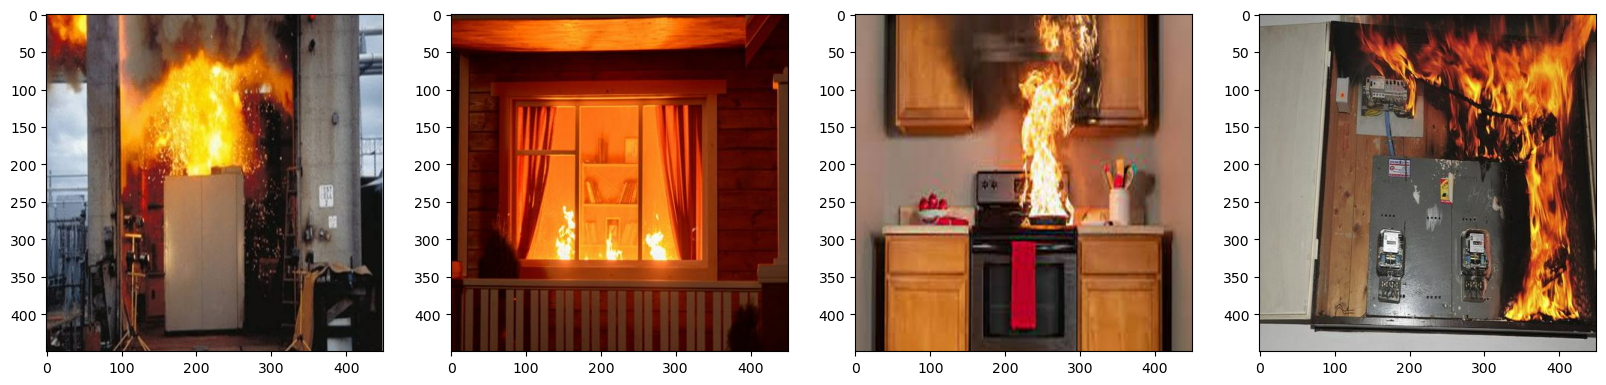

In [102]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, image in enumerate(plot_images):
    ax[idx].imshow(image) 
plt.show()

In [103]:
import albumentations as alb



In [104]:
augmentor = alb.Compose([alb.RandomCrop(width=450, height=450), 
                         alb.HorizontalFlip(p=0.5), 
                         alb.RandomBrightnessContrast(p=0.2),
                         alb.RandomGamma(p=0.2), 
                         alb.RGBShift(p=0.2), 
                         alb.VerticalFlip(p=0.5)], 
                       bbox_params=alb.BboxParams(format='albumentations', 
                                                  label_fields=['class_labels']))


In [106]:
### 4.2 Load a Test Image and Annotation with OpenCV and JSON

img = cv2.imread(os.path.join('D:\\Training Data - YSG\\Nat', 'images', '_2021050716334916692.jpg'))

with open(os.path.join('D:\\Training Data - YSG\\Nat', 'labels', '_2021050716334916692.json'), 'r') as f:
    label = json.load(f)


In [107]:
### 4.3 Extract Coordinates and Rescale to Match Image Resolution


label['shapes'][0]['points']


[[251.95945945945942, 189.0540540540541],
 [341.55405405405406, 273.91891891891896]]

In [108]:
coords = [0,0,0,0]
coords[0] = label['shapes'][0]['points'][0][0]
coords[1] = label['shapes'][0]['points'][0][1]
coords[2] = label['shapes'][0]['points'][1][0]
coords[3] = label['shapes'][0]['points'][1][1]



In [109]:

coords


[251.95945945945942, 189.0540540540541, 341.55405405405406, 273.91891891891896]

In [110]:
coords = list(np.divide(coords, [640,480,640,480]))

coords


[0.3936866554054054,
 0.3938626126126127,
 0.5336782094594594,
 0.5706644144144145]

In [111]:
augmented = augmentor(image=img, bboxes=[coords], class_labels=['fire'])

In [112]:
type(img)

numpy.ndarray

In [113]:
img


array([[[114, 125, 117],
        [113, 124, 116],
        [111, 122, 114],
        ...,
        [197, 184, 162],
        [193, 183, 159],
        [193, 184, 157]],

       [[ 85,  96,  88],
        [ 84,  95,  87],
        [ 83,  94,  86],
        ...,
        [196, 183, 161],
        [193, 183, 159],
        [193, 184, 157]],

       [[ 65,  76,  68],
        [ 64,  75,  67],
        [ 63,  74,  66],
        ...,
        [195, 182, 160],
        [192, 182, 158],
        [192, 182, 158]],

       ...,

       [[ 35,  38,  59],
        [ 37,  40,  61],
        [ 41,  44,  65],
        ...,
        [134, 146, 146],
        [131, 144, 142],
        [130, 144, 140]],

       [[ 36,  39,  60],
        [ 40,  43,  64],
        [ 45,  48,  69],
        ...,
        [142, 154, 154],
        [133, 146, 144],
        [131, 144, 142]],

       [[ 36,  39,  60],
        [ 40,  43,  64],
        [ 45,  48,  69],
        ...,
        [138, 150, 150],
        [133, 146, 144],
        [131, 144, 142]]

In [114]:
augmented['bboxes'][0][2:]

(0.5336782094594594, 0.5706644144144145)

In [115]:
augmented['bboxes']


[(0.3936866554054054,
  0.3938626126126127,
  0.5336782094594594,
  0.5706644144144145)]

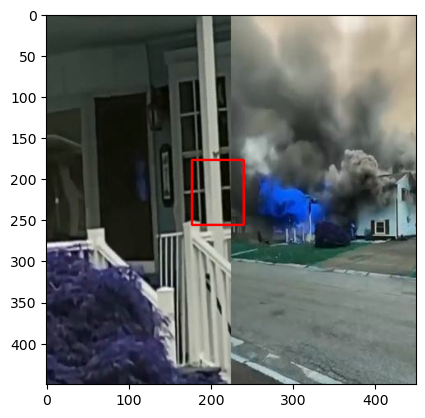

In [116]:

cv2.rectangle(augmented['image'], 
              tuple(np.multiply(augmented['bboxes'][0][:2], [450,450]).astype(int)),
              tuple(np.multiply(augmented['bboxes'][0][2:], [450,450]).astype(int)), 
                    (255,0,0), 2)

plt.imshow(augmented['image'])

In [117]:
for partition in ['train','test','val']: 
    for image in os.listdir(os.path.join('data', partition, 'images')):
        img = cv2.imread(os.path.join('data', partition, 'images', image))

        coords = [0,0,0.00001,0.00001]
        label_path = os.path.join('data', partition, 'labels', f'{image.split(".")[0]}.json')
        if os.path.exists(label_path):
            with open(label_path, 'r') as f:
                label = json.load(f)

            coords[0] = label['shapes'][0]['points'][0][0]
            coords[1] = label['shapes'][0]['points'][0][1]
            coords[2] = label['shapes'][0]['points'][1][0]
            coords[3] = label['shapes'][0]['points'][1][1]
            coords = list(np.divide(coords, [640,480,640,480]))

        try: 
            for x in range(60):
                augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])
                cv2.imwrite(os.path.join('aug_data', partition, 'images', f'{image.split(".")[0]}.{x}.jpg'), augmented['image'])

                annotation = {}
                annotation['image'] = image

                if os.path.exists(label_path):
                    if len(augmented['bboxes']) == 0: 
                        annotation['bbox'] = [0,0,0,0]
                        annotation['class'] = 0 
                    else: 
                        annotation['bbox'] = augmented['bboxes'][0]
                        annotation['class'] = 1
                else: 
                    annotation['bbox'] = [0,0,0,0]
                    annotation['class'] = 0 


                with open(os.path.join('aug_data', partition, 'labels', f'{image.split(".")[0]}.{x}.json'), 'w') as f:
                    json.dump(annotation, f)

        except Exception as e:
            print(e)

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'data\\train\\images'